# Application: Heterogeneous Effect of Gender on Wage Using Double Lasso

 We use US census data from the year 2012 to analyse the effect of gender and interaction effects of other variables with gender on wage jointly. The dependent variable is the logarithm of the wage, the target variable is *female* (in combination with other variables). All other variables denote some other socio-economic characteristics, e.g. marital status, education, and experience.  For a detailed description of the variables we refer to the help page.



This analysis allows a closer look how discrimination according to gender is related to other socio-economic variables.



In [1]:
library(hdm)
data(cps2012)
str(cps2012)

'data.frame':	29217 obs. of  23 variables:
 $ year        : num  2012 2012 2012 2012 2012 ...
 $ lnw         : num  1.91 1.37 2.54 1.8 3.35 ...
 $ female      : num  1 1 0 1 0 0 0 0 0 1 ...
 $ widowed     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ divorced    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ separated   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ nevermarried: num  0 0 0 0 0 0 1 0 0 0 ...
 $ hsd08       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hsd911      : num  0 1 0 0 0 0 0 0 0 0 ...
 $ hsg         : num  0 0 1 1 0 1 1 0 0 0 ...
 $ cg          : num  0 0 0 0 1 0 0 0 1 0 ...
 $ ad          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mw          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ so          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ we          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ exp1        : num  22 30 19 14 15 23 33 23.5 15 15.5 ...
 $ exp2        : num  4.84 9 3.61 1.96 2.25 ...
 $ exp3        : num  10.65 27 6.86 2.74 3.38 ...
 $ exp4        : num  23.43 81 13.03 3.84 5.06 ...
 $ weight      : num  569 626 264 257 257 ...
 $ 

In [2]:
X <- model.matrix(~-1 + female + female:(widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + +(widowed +
divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +
we + exp1 + exp2 + exp3)^2, data = cps2012)

In [3]:
length(colnames(X))

[1] 136

In [4]:
apply(X, 2, var)

female                widowed               divorced 
          2.449329e-01           7.911482e-03           1.005384e-01 
             separated           nevermarried                  hsd08 
          1.632493e-02           1.319074e-01           4.090469e-03 
                hsd911                    hsg                     cg 
          2.168771e-02           1.861428e-01           2.031048e-01 
                    ad                     mw                     so 
          1.315307e-01           2.065954e-01           2.028524e-01 
                    we                   exp1                   exp2 
          1.597918e-01           7.686099e+01           1.103240e+01 
                  exp3         female:widowed        female:divorced 
          1.236959e+02           6.123051e-03           5.919240e-02 
      female:separated    female:nevermarried           female:hsd08 
          8.853657e-03           6.388777e-02           1.094091e-03 
         female:hsd911             female:hsg              female:cg 
          6.292052e-03           8.451597e-02           1.101702e-01 
             female:ad              female:mw              female:so 
          6.720998e-02           1.124138e-01           1.075728e-01 
             female:we            female:exp1            female:exp2 
          7.428155e-02           1.188113e+02           9.225436e+00 
           female:exp3       widowed:divorced      widowed:separated 
          8.165389e+01           0.000000e+00           0.000000e+00 
  widowed:nevermarried          widowed:hsd08         widowed:hsd911 
          0.000000e+00           0.000000e+00           5.131537e-04 
           widowed:hsg             widowed:cg             widowed:ad 
          3.105030e-03           1.367238e-03           7.524450e-04 
            widowed:mw             widowed:so             widowed:we 
          2.253933e-03           2.662643e-03           1.537880e-03 
          widowed:exp1           widowed:exp2           widowed:exp3 
          5.426777e+00           4.559676e-01           4.232926e+00 
    divorced:separated  divorced:nevermarried         divorced:hsd08 
          0.000000e+00           0.000000e+00           4.105651e-04 
       divorced:hsd911           divorced:hsg            divorced:cg 
          3.614986e-03           3.391635e-02           2.332026e-02 
           divorced:ad            divorced:mw            divorced:so 
          1.049804e-02           3.264162e-02           3.264162e-02 
           divorced:we          divorced:exp1          divorced:exp2 
          2.247206e-02           5.417454e+01           4.024255e+00 
         divorced:exp3 separated:nevermarried        separated:hsd08 
          3.450516e+01           0.000000e+00           1.368925e-04 
      separated:hsd911          separated:hsg           separated:cg 
          6.499057e-04           5.311030e-03           3.071015e-03 
          separated:ad           separated:mw           separated:so 
          1.503756e-03           3.513037e-03           5.378750e-03 
          separated:we         separated:exp1         separated:exp2 
          3.716914e-03           7.345042e+00           5.002708e-01 
        separated:exp3     nevermarried:hsd08    nevermarried:hsd911 
          4.128964e+00           8.207929e-04           3.886747e-03 
      nevermarried:hsg        nevermarried:cg        nevermarried:ad 
          3.781268e-02           4.695138e-02           1.995081e-02 
       nevermarried:mw        nevermarried:so        nevermarried:we 
          4.192345e-02           3.834841e-02           3.133112e-02 
     nevermarried:exp1      nevermarried:exp2      nevermarried:exp3 
          3.488279e+01           2.134555e+00           1.689368e+01 
          hsd08:hsd911              hsd08:hsg               hsd08:cg 
          0.000000e+00           0.000000e+00           0.000000e+00 
              hsd08:ad               hsd08:mw               hsd08:so 
          0.000000e+00    

In [5]:
# create the model matrix for the covariates
X <- model.matrix(~-1 + female + female:(widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + +(widowed +
divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +
we + exp1 + exp2 + exp3)^2, data = cps2012)
X <- X[, which(apply(X, 2, var) != 0)] # exclude all constant variables
demean<- function (x){ x- mean(x)}
X<- apply(X, 2, FUN=demean)
dim(X)

# target variables, index.gender specifices coefficients we are interested in
index.gender <- grep("female", colnames(X))
y <- cps2012$lnw

[1] 29217   116

The parameter estimates for the target parameters, i.e. all coefficients related to gender (i.e. by interaction with other variables) are calculated and summarized by the following commands:



In [6]:
# this cell takes a minute to run

    effects.female <- rlassoEffects(x = X, y = y, index = index.gender)


In [7]:
result=summary(effects.female)
result$coef
library(xtable)
print(xtable(result$coef[,c(1,2,4)], type="latex"), digits=3)


Estimate.    Std. Error  t value     Pr(>|t|)    
female              -0.154923281 0.050162447 -3.08843149 2.012161e-03
female:widowed       0.136095484 0.090662629  1.50111997 1.333245e-01
female:divorced      0.136939386 0.022181700  6.17352970 6.678200e-10
female:separated     0.023302763 0.053211795  0.43792476 6.614408e-01
female:nevermarried  0.186853483 0.019942393  9.36966209 7.276511e-21
female:hsd08         0.027810312 0.120914496  0.22999982 8.180919e-01
female:hsd911       -0.119335040 0.051879684 -2.30022682 2.143537e-02
female:hsg          -0.012889780 0.019223188 -0.67053290 5.025181e-01
female:cg            0.010138553 0.018326505  0.55321800 5.801141e-01
female:ad           -0.030463745 0.021806103 -1.39702838 1.624050e-01
female:mw           -0.001063439 0.019191770 -0.05541119 9.558109e-01
female:so           -0.008183343 0.019356818 -0.42276282 6.724683e-01
female:we           -0.004226129 0.021168404 -0.19964324 8.417596e-01
female:exp1          0.004935259 0.007804275  0.63237886 5.271393e-01
female:exp2         -0.159519328 0.045299884 -3.52140699 4.292632e-04
female:exp3          0.038450579 0.007861100  4.89124680 1.001992e-06

% latex table generated in R 4.0.4 by xtable 1.8-4 package
% Wed Apr 14 19:10:31 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrr}
  \hline
 & Estimate. & Std. Error & Pr($>$$|$t$|$) \\ 
  \hline
female & -0.15 & 0.05 & 0.00 \\ 
  female:widowed & 0.14 & 0.09 & 0.13 \\ 
  female:divorced & 0.14 & 0.02 & 0.00 \\ 
  female:separated & 0.02 & 0.05 & 0.66 \\ 
  female:nevermarried & 0.19 & 0.02 & 0.00 \\ 
  female:hsd08 & 0.03 & 0.12 & 0.82 \\ 
  female:hsd911 & -0.12 & 0.05 & 0.02 \\ 
  female:hsg & -0.01 & 0.02 & 0.50 \\ 
  female:cg & 0.01 & 0.02 & 0.58 \\ 
  female:ad & -0.03 & 0.02 & 0.16 \\ 
  female:mw & -0.00 & 0.02 & 0.96 \\ 
  female:so & -0.01 & 0.02 & 0.67 \\ 
  female:we & -0.00 & 0.02 & 0.84 \\ 
  female:exp1 & 0.00 & 0.01 & 0.53 \\ 
  female:exp2 & -0.16 & 0.05 & 0.00 \\ 
  female:exp3 & 0.04 & 0.01 & 0.00 \\ 
   \hline
\end{tabular}
\end{table}


Now, we estimate and plot confident intervals, first "pointwise" and then the joint confidence intervals.

In [ ]:
result$coef

5 %          95 %        
female              -0.237433164 -0.072413398
female:widowed      -0.013031271  0.285222239
female:divorced      0.100453736  0.173425037
female:separated    -0.064222851  0.110828376
female:nevermarried  0.154051166  0.219655800
female:hsd08        -0.171076335  0.226696960
female:hsd911       -0.204669525 -0.034000554
female:hsg          -0.044509111  0.018729551
female:cg           -0.020005866  0.040282971
female:ad           -0.066331593  0.005404103
female:mw           -0.032631091  0.030504214
female:so           -0.040022474  0.023655789
female:we           -0.039045055  0.030592798
female:exp1         -0.007901632  0.017772149
female:exp2         -0.234031007 -0.085007650
female:exp3          0.025520220  0.051380937

Warning message:
"Ignoring unknown aesthetics: width, h"


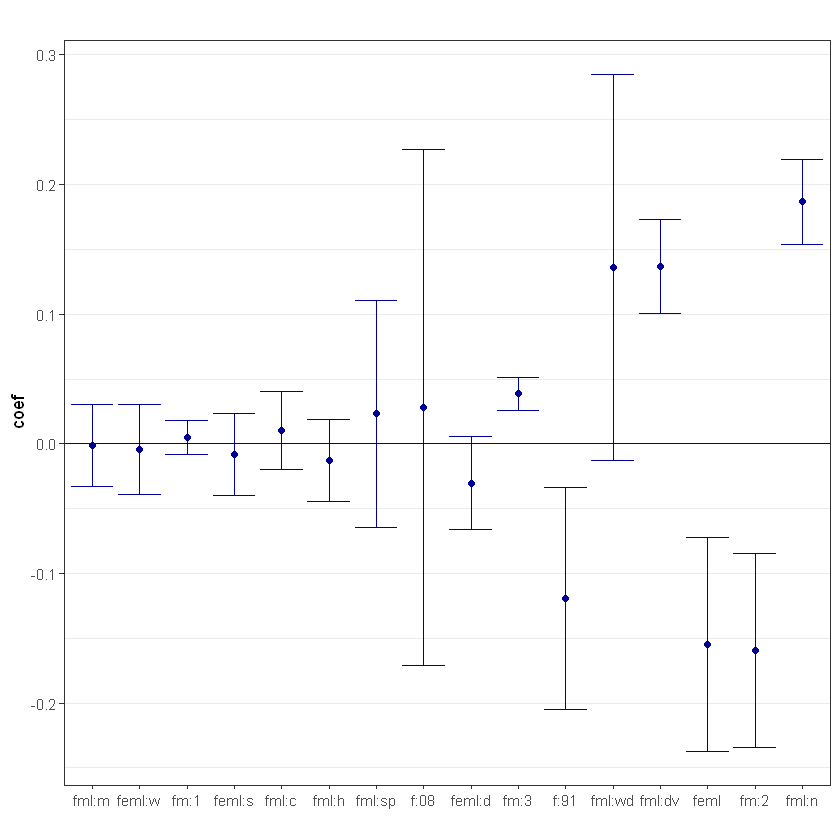

In [18]:
pointwise.CI <- confint(effects.female, level = 0.90)
pointwise.CI
plot(effects.female, level=0.90) # plot of the effects



Finally, we compare the pointwise confidence intervals to joint confidence intervals.

In [130]:
p = 16

In [132]:
s = rnorm(p * n)

In [ ]:
s

In [ ]:
matrix(s, n)

In [34]:
dim(X)

[1] 29217   116

In [200]:
e = effects.female$residuals$e
v = effects.female$residuals$v

In [201]:
Ev = colMeans( v ^ 2 )

In [202]:
print(Ev)

             female      female:widowed     female:divorced    female:separated 
       0.0045484685        0.0013881983        0.0231625176        0.0040301662 
female:nevermarried        female:hsd08       female:hsd911          female:hsg 
       0.0286077694        0.0007805201        0.0042384882        0.0308804839 
          female:cg           female:ad           female:mw           female:so 
       0.0339764320        0.0239969743        0.0309883321        0.0304619517 
          female:we         female:exp1         female:exp2         female:exp3 
       0.0254662378        0.1873626646        0.0055602499        0.1845098337 


In [203]:
ev <- e * v

In [204]:
k = 16 

In [205]:
B <- 500

In [206]:
n <- 29217

In [207]:
#eigen( Omegahat/n )

In [208]:
Ev2 <- colMeans(v^2)
Omegahat <- matrix(NA, ncol = k, nrow = k)
for (j in 1:k) {
    for (l in 1:k) {
        Omegahat[j, l] = Omegahat[l, j] = 1/(Ev2[j] * 
          Ev2[l]) * mean(ev[, j] * ev[, l])
    }
}
var <- diag(Omegahat)

sim <- vector("numeric", length = B)
for (i in 1:B) {
    beta_i <- MASS::mvrnorm(mu = rep(0, k), Sigma = Omegahat/n)
    sim[i] <- max(abs(beta_i/sqrt(var)))
}

In [211]:
quantile( sim, probs = 0.9)

90% 
0.01534188

In [150]:
MASS::mvrnorm(mu = rep(0, k), Sigma = Omegahat/n, n = 1 )

[1]  4.7950817  1.4740142  1.8476901  7.3697791  2.0241261  4.5523937
 [7]  9.6723088 -0.4363062  5.9290434  1.6436956 -3.3145049 -2.6612264
[13]  1.3784180 -1.9301258  9.1920219 -1.4265030

In [166]:
Omegahat/n

[,1]        [,2]         [,3]       [,4]        [,5]        [,6]       
 [1,]  69.0011817   1.69258124 -1.0495805 -0.98311835 -4.78035613 -11.5467259
 [2,]   1.6925812 258.77544131  0.4258934  0.46933319  0.09547703   0.2628873
 [3,]  -1.0495805   0.42589336 13.7316620  1.28300312  1.54732031  -2.1147520
 [4,]  -0.9831184   0.46933319  1.2830031 69.71447662  1.44610064  -1.4108493
 [5,]  -4.7803561   0.09547703  1.5473203  1.44610064 11.79576484   0.6332743
 [6,] -11.5467259   0.26288730 -2.1147520 -1.41084929  0.63327431 575.5377319
 [7,]  -3.7447350   5.40352236  0.3386030  1.78478091  1.26073083   1.0323417
 [8,]  -4.9937033   0.35506149 -0.1511141  0.38419920  0.74647137   2.9497272
 [9,]  -6.3834284   0.11084202  0.3240220  0.06979047 -0.52879538   1.5493714
[10,]  -5.7704548  -0.83378724  0.4755425 -0.02327326 -0.05685906   1.2316903
[11,]  -5.7455968   0.38484263  0.1906294 -0.23747303  0.10316040   2.7584314
[12,]  -5.3232941   1.50122041  0.7784682 -0.53884944 -0.68698659  -0.6444231
[13,]  -6.0550182   0.19185396  0.3838500  0.39001579 -0.61580101  -0.9014459
[14,]  -7.9648915  -0.10608346 -0.1690945 -0.12997175  0.37781953   1.6417711
[15,]  30.8151358  -0.89470357  1.1187075  0.83265490  0.64636307 -10.7036259
[16,]  -4.3192423   0.25719767 -0.2123425 -0.29342746  0.16603865   2.0405812
      [,7]       [,8]        [,9]        [,10]       [,11]         [,12]      
 [1,] -3.7447350 -4.99370329 -6.38342837 -5.77045481 -5.7455967992 -5.32329406
 [2,]  5.4035224  0.35506149  0.11084202 -0.83378724  0.3848426276  1.50122041
 [3,]  0.3386030 -0.15111407  0.32402198  0.47554247  0.1906293589  0.77846815
 [4,]  1.7847809  0.38419920  0.06979047 -0.02327326 -0.2374730294 -0.53884944
 [5,]  1.2607308  0.74647137 -0.52879538 -0.05685906  0.1031604014 -0.68698659
 [6,]  1.0323417  2.94972719  1.54937141  1.23169032  2.7584313641 -0.64442308
 [7,] 79.6766695  4.75379568  4.01488725  3.84634333 -0.3407314040  0.16517582
 [8,]  4.7537957  9.70765364  4.20551026  4.10298375  0.0612715854 -0.23265543
 [9,]  4.0148873  4.20551026  9.54874838  4.60266740 -0.5347324729 -0.34980454
[10,]  3.8463433  4.10298375  4.60266740 15.19658021 -0.4539592278 -0.21666759
[11,] -0.3407314  0.06127159 -0.53473247 -0.45395923 10.2328587565  5.82327216
[12,]  0.1651758 -0.23265543 -0.34980454 -0.21666759  5.8232721602 10.57633928
[13,] -0.4109546 -0.15369660 -0.03301887  0.58527767  5.8201415653  5.82019887
[14,]  0.5260921  0.23046184  0.27261706 -0.12178052 -0.0002390817 -0.11810990
[15,]  1.2028418 -0.26980905  0.28934667  2.80798742 -0.2895467853  0.02689258
[16,] -0.2127171  0.01700924 -0.08066227 -0.44185533  0.0796412156 -0.02185863
      [,13]       [,14]         [,15]        [,16]      
 [1,] -6.05501822 -7.9648915117  30.81513576 -4.31924226
 [2,]  0.19185396 -0.1060834643  -0.89470357  0.25719767
 [3,]  0.38385000 -0.1690944537   1.11870745 -0.21234254
 [4,]  0.39001579 -0.1299717478   0.83265490 -0.29342746
 [5,] -0.61580101  0.3778195278   0.64636307  0.16603865
 [6,] -0.90144590  1.6417711182 -10.70362585  2.04058116
 [7,] -0.41095459  0.5260921135   1.20284182 -0.21271711
 [8,] -0.15369660  0.2304618400  -0.26980905  0.01700924
 [9,] -0.03301887  0.2726170590   0.28934667 -0.08066227
[10,]  0.58527767 -0.1217805242   2.80798742 -0.44185533
[11,]  5.82014157 -0.0002390817  -0.28954679  0.07964122
[12,]  5.82019887 -0.1181098962   0.02689258 -0.02185863
[13,] 13.40664800 -0.0836395646   0.43344893 -0.08766802
[14,] -0.08363956  1.6331177154  -7.45221044  1.15896025
[15,]  0.43344893 -7.4522104410  55.22796606 -8.94909838
[16,] -0.08766802  1.1589602546  -8.94909838  1.65946028

In [74]:
EV * c( 1 , 2, 4, 6, 8, 10, 12 , 14, 14, 10, 10, 10 , 10, 10, 10 , 10 )

female      female:widowed     female:divorced    female:separated 
        0.004548468         0.002776397         0.092650070         0.024180997 
female:nevermarried        female:hsd08       female:hsd911          female:hsg 
        0.228862155         0.007805201         0.050861858         0.432326774 
          female:cg           female:ad           female:mw           female:so 
        0.475670048         0.239969743         0.309883321         0.304619517 
          female:we         female:exp1         female:exp2         female:exp3 
        0.254662378         1.873626646         0.055602499         1.845098337

In [136]:
mu = rep(0, k)

In [167]:
getAnywhere( confint.rlassoEffects )

A single object matching 'confint.rlassoEffects' was found
It was found in the following places
  registered S3 method for confint from namespace hdm
  namespace:hdm
with value

function (object, parm, level = 0.95, joint = FALSE, ...) 
{
    B <- 500
    n <- object$samplesize
    k <- p1 <- length(object$coefficients)
    cf <- coef(object)
    pnames <- names(cf)
    if (missing(parm)) 
        parm <- pnames
    else if (is.numeric(parm)) 
        parm <- pnames[parm]
    if (!joint) {
        a <- (1 - level)/2
        a <- c(a, 1 - a)
        fac <- qnorm(a)
        pct <- format.perc(a, 3)
        ci <- array(NA, dim = c(length(parm), 2L), dimnames = list(parm, 
            pct))
        ses <- object$se[parm]
        ci[] <- cf[parm] + ses %o% fac
    }
    if (joint) {
        e <- object$residuals$e
        v <- object$residuals$v
        ev <- e * v
        Ev2 <- colMeans(v^2)
        Omegahat <- matrix(NA, ncol = k, nrow = k)
        for (j in 1:k) {
            for (l in 

In [215]:
Omegahat[l, j] = 1/(Ev2[1] * 
                  Ev2[2]) * mean(ev[, 2] * ev[, 1])

In [223]:
mean(ev[, 1] * ev[,2])

[1] 1.068726e-05

In [219]:
1/(c(2,3) * c(4,5)) * mean( c(2,3) * c(4,5) )

[1] 1.4375000 0.7666667

In [216]:
1/(Ev2[1] * Ev2[2]) * mean(ev[, 2] * ev[, 1])

female 
1.692581

In [213]:
quantile( sim, probs = 0.9)

90% 
0.01534188

In [197]:
stats:::format.perc( 0.345534534, 7)

[1] "34.55345 %"

In [156]:
getAnywhere( mvrnorm )

A single object matching 'mvrnorm' was found
It was found in the following places
  namespace:MASS
with value

function (n = 1, mu, Sigma, tol = 1e-06, empirical = FALSE, EISPACK = FALSE) 
{
    p <- length(mu)
    if (!all(dim(Sigma) == c(p, p))) 
        stop("incompatible arguments")
    if (EISPACK) 
        stop("'EISPACK' is no longer supported by R", domain = NA)
    eS <- eigen(Sigma, symmetric = TRUE)
    ev <- eS$values
    if (!all(ev >= -tol * abs(ev[1L]))) 
        stop("'Sigma' is not positive definite")
    X <- matrix(rnorm(p * n), n)
    if (empirical) {
        X <- scale(X, TRUE, FALSE)
        X <- X %*% svd(X, nu = 0)$v
        X <- scale(X, FALSE, TRUE)
    }
    X <- drop(mu) + eS$vectors %*% diag(sqrt(pmax(ev, 0)), p) %*% 
        t(X)
    nm <- names(mu)
    if (is.null(nm) && !is.null(dn <- dimnames(Sigma))) 
        nm <- dn[[1L]]
    dimnames(X) <- list(nm, NULL)
    if (n == 1) 
        drop(X)
    else t(X)
}
<bytecode: 0x00000000296fd7a0>
<environment: na

In [158]:
X <- matrix(rnorm(p * n), n)

In [ ]:
t(X)

In [157]:
ev = eigen(Omegahat/n, symmetric = TRUE)$values
evc = eigen(Omegahat/n, symmetric = TRUE)$vectors

In [ ]:
diag(sqrt(pmax(ev, 0)), p) %*% t(X)

In [ ]:
drop(rep(0, k)) + evc %*% diag(sqrt(pmax(ev, 0)), p) %*% t(X)

In [ ]:
n = 1

In [ ]:
eS$vectors

In [145]:
dim(matrix(rnorm(p * n), n))

[1]  1 16

In [ ]:
mvrnorm(mu = rep( 0 , k ) , Sigma = Omegahat/n )

In [214]:
result$coef

Estimate.    Std. Error  t value     Pr(>|t|)    
female              -0.154923281 0.050162447 -3.08843149 2.012161e-03
female:widowed       0.136095484 0.090662629  1.50111997 1.333245e-01
female:divorced      0.136939386 0.022181700  6.17352970 6.678200e-10
female:separated     0.023302763 0.053211795  0.43792476 6.614408e-01
female:nevermarried  0.186853483 0.019942393  9.36966209 7.276511e-21
female:hsd08         0.027810312 0.120914496  0.22999982 8.180919e-01
female:hsd911       -0.119335040 0.051879684 -2.30022682 2.143537e-02
female:hsg          -0.012889780 0.019223188 -0.67053290 5.025181e-01
female:cg            0.010138553 0.018326505  0.55321800 5.801141e-01
female:ad           -0.030463745 0.021806103 -1.39702838 1.624050e-01
female:mw           -0.001063439 0.019191770 -0.05541119 9.558109e-01
female:so           -0.008183343 0.019356818 -0.42276282 6.724683e-01
female:we           -0.004226129 0.021168404 -0.19964324 8.417596e-01
female:exp1          0.004935259 0.007804275  0.63237886 5.271393e-01
female:exp2         -0.159519328 0.045299884 -3.52140699 4.292632e-04
female:exp3          0.038450579 0.007861100  4.89124680 1.001992e-06

In [ ]:
result$coef[, 1] + (1.645* result$coef[, 2])

5 %         95 %       
female              -0.28511760 -0.02472896
female:widowed      -0.11603497  0.38822594
female:divorced      0.07885956  0.19501922
female:separated    -0.10756277  0.15416829
female:nevermarried  0.13302318  0.24068379
female:hsd08        -0.34820080  0.40382142
female:hsd911       -0.25923879  0.02056871
female:hsg          -0.06172362  0.03594406
female:cg           -0.03829396  0.05857107
female:ad           -0.09156311  0.03063562
female:mw           -0.05120089  0.04907401
female:so           -0.05915532  0.04278863
female:we           -0.06161450  0.05316224
female:exp1         -0.01509435  0.02496487
female:exp2         -0.27599717 -0.04304149
female:exp3          0.01826007  0.05864108

Warning message:
"Ignoring unknown aesthetics: width, h"


% latex table generated in R 4.0.4 by xtable 1.8-4 package
% Tue Apr 13 17:18:57 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrr}
  \hline
 & 5 \% & 95 \% \\ 
  \hline
female & -0.29 & -0.02 \\ 
  female:widowed & -0.12 & 0.39 \\ 
  female:divorced & 0.08 & 0.20 \\ 
  female:separated & -0.11 & 0.15 \\ 
  female:nevermarried & 0.13 & 0.24 \\ 
  female:hsd08 & -0.35 & 0.40 \\ 
  female:hsd911 & -0.26 & 0.02 \\ 
  female:hsg & -0.06 & 0.04 \\ 
  female:cg & -0.04 & 0.06 \\ 
  female:ad & -0.09 & 0.03 \\ 
  female:mw & -0.05 & 0.05 \\ 
  female:so & -0.06 & 0.04 \\ 
  female:we & -0.06 & 0.05 \\ 
  female:exp1 & -0.02 & 0.02 \\ 
  female:exp2 & -0.28 & -0.04 \\ 
  female:exp3 & 0.02 & 0.06 \\ 
   \hline
\end{tabular}
\end{table}


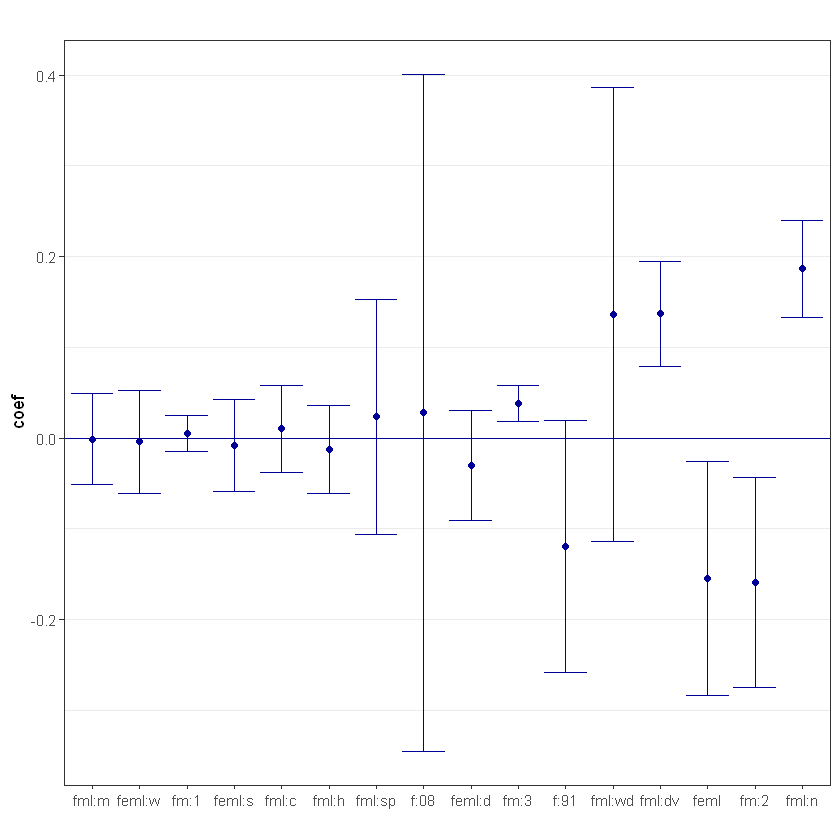

In [212]:
joint.CI <- confint(effects.female, level = 0.90, joint = TRUE)
joint.CI
plot(effects.female, joint=TRUE, level=0.90) # plot of the effects
print(xtable(joint.CI), type="latex")

# the plot output does not look great

In [20]:
joint.CI

5 %         95 %       
female              -0.28511502 -0.02473155
female:widowed      -0.11602996  0.38822093
female:divorced      0.07886071  0.19501806
female:separated    -0.10756017  0.15416569
female:nevermarried  0.13302425  0.24068272
female:hsd08        -0.34819333  0.40381396
female:hsd911       -0.25923601  0.02056593
female:hsg          -0.06172265  0.03594309
female:cg           -0.03829300  0.05857010
female:ad           -0.09156190  0.03063441
female:mw           -0.05119990  0.04907302
female:so           -0.05915431  0.04278762
female:we           -0.06161336  0.05316110
female:exp1         -0.01509395  0.02496447
female:exp2         -0.27599485 -0.04304380
female:exp3          0.01826047  0.05864068